In [2]:
import numpy as np
import matplotlib.pyplot as py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("wine_data.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.	What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quantity column?

In [12]:
most_frequent_quality = df['quality'].mode()[0]
print("The most frequently occurring wine quality is:",most_frequent_quality)

highest_quality = df['quality'].max()
lowest_quality = df['quality'].min()
print("The highest quality score is:",highest_quality)
print("The lowest quality score is:",lowest_quality)

The most frequently occurring wine quality is: 5
The highest quality score is: 8
The lowest quality score is: 3


2.	How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?

In [14]:
correllation_fixed_acidity = df['quality'].corr(df['fixed acidity'])
correllation_fixed_acidity=round(correllation_fixed_acidity,2)
print("The correlation between fixed acidity and quality is:",correllation_fixed_acidity)

correllation_alcohol = df['quality'].corr(df['alcohol'])
correllation_alcohol=round(correllation_alcohol,2)
print("The correlation between alcohol and quality is:",correllation_alcohol)

correllation_sulfur_dioxide = df['quality'].corr(df['free sulfur dioxide'])
correllation_fixed_acidity=round(correllation_sulfur_dioxide,2)
print("The correlation between free sulfur dioxide and quality is:",correllation_sulfur_dioxide)

The correlation between fixed acidity and quality is: 0.12
The correlation between alcohol and quality is: 0.48
The correlation between free sulfur dioxide and quality is: -0.05065605724427629


3.	What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?

In [15]:
residual_sugar=df.groupby('quality')['residual sugar'].mean()
print("The average residual sugar for the best quality wine is:",residual_sugar.max())
print("The average residual sugar for the lowest quality wine is:",residual_sugar.min())

The average residual sugar for the best quality wine is: 2.7206030150753766
The average residual sugar for the lowest quality wine is: 2.477194357366771


4.	Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?

In [16]:
volatile_acid=df.groupby('quality')['volatile acidity'].mean()
print("The average volatile acidity for the best quality wine is:",volatile_acid.max())
print("The average volatile acidity for the lowest quality wine is:",volatile_acid.min())


The average volatile acidity for the best quality wine is: 0.8845000000000001
The average volatile acidity for the lowest quality wine is: 0.40391959798994975


5.	Train a Decision Tree model

In [26]:
X = df.iloc[:,:11]
y = df.iloc[:,11]

In [31]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [32]:
df['quality'].value_counts(normalize=True)
clf = DecisionTreeClassifier(random_state=2021)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2021)

In [33]:
clf.feature_importances_

array([0.08350668, 0.16329044, 0.04161851, 0.06321268, 0.07488494,
       0.09543284, 0.03785377, 0.05728628, 0.09962007, 0.08622466,
       0.19706913])

In [34]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[  0   3   3   2   0   0]
 [  1   5  19  14   3   0]
 [  5  25 321 176  16   2]
 [  1  10 144 277  71   7]
 [  0   0  16  73  64   6]
 [  0   0   0   3  11   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.12      0.12      0.12        42
           5       0.64      0.59      0.61       545
           6       0.51      0.54      0.53       510
           7       0.39      0.40      0.40       159
           8       0.06      0.07      0.06        15

    accuracy                           0.52      1279
   macro avg       0.29      0.29      0.29      1279
weighted avg       0.53      0.52      0.52      1279

0.5222830336200156


In [41]:
import graphviz
from sklearn import tree


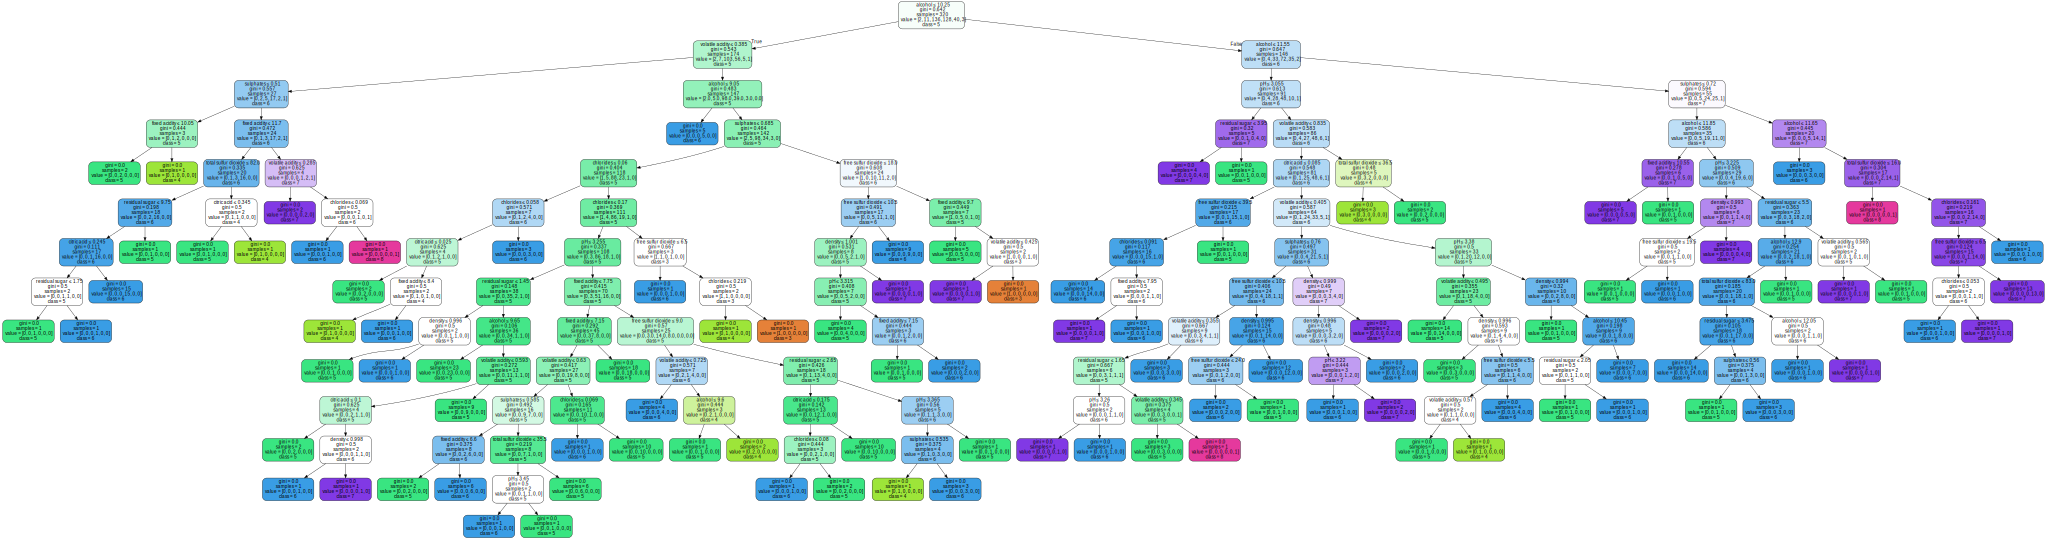

In [43]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=X_train.columns,
                         class_names=[str(x) for x in sorted(y_train.unique())],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

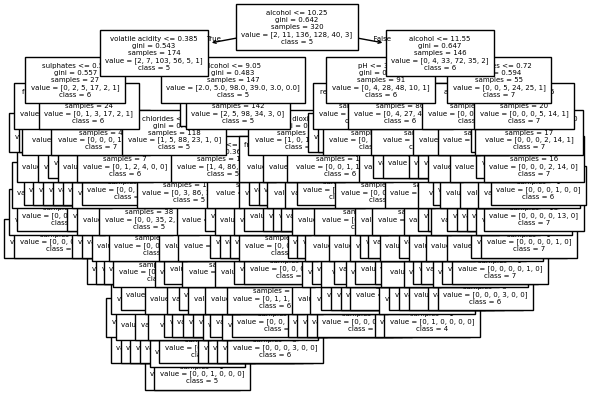

In [45]:
tree.plot_tree(clf,feature_names=X_train.columns,
               class_names=[str(x) for x in sorted(y_train.unique())],
               filled=False,fontsize=5)
#######################Grid Search CV###########################
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]